In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../src/')))
from lidar_data_visualizer import Lidar_Visualizer
from transformation_utility import Lidar_Transformation
from lidar_data_processor import Lidar_Processor

In [2]:
visulizer = Lidar_Visualizer()

In [3]:
polygon_array= [446112.3120340019  , 4652575.060161518 , 447610.6998241764,4654067.900678839]
processor = Lidar_Processor(polygon_array = polygon_array, epsg=26915)
geo_df , tiff_file_path  , pipeline_array= processor.fetch_file()
pipeline_array

array([(2, 0, 55120.84330933, 102, 1, 17584, 79, 1,   9., 0, 70, 447619.532817  , 4654049.61183342, 275.39),
       (2, 0, 55120.84331949,  94, 1, 17584, 79, 1,   9., 0, 70, 447617.71575244, 4654049.247439  , 275.37),
       (2, 0, 55120.85826116,  64, 1, 17584, 79, 1,   9., 1, 70, 447613.81440886, 4654049.58739737, 275.26),
       ...,
       (2, 0, 56177.16509408, 116, 1, 17583, 85, 1, -10., 1, 69, 446706.44921099, 4652747.18580146, 278.66),
       (2, 0, 56177.16510424, 107, 1, 17583, 85, 1, -10., 1, 69, 446704.72580347, 4652747.45808224, 278.86),
       (2, 0, 56177.18206864,  62, 2, 17583, 85, 2, -10., 0, 69, 446701.78963797, 4652746.67991598, 278.99)],
      dtype=[('Classification', 'u1'), ('EdgeOfFlightLine', 'u1'), ('GpsTime', '<f8'), ('Intensity', '<u2'), ('NumberOfReturns', 'u1'), ('OriginId', '<u4'), ('PointSourceId', '<u2'), ('ReturnNumber', 'u1'), ('ScanAngleRank', '<f4'), ('ScanDirectionFlag', 'u1'), ('UserData', 'u1'), ('X', '<f8'), ('Y', '<f8'), ('Z', '<f8')])

In [4]:
transformer = Lidar_Transformation(df=geo_df)

In [5]:
decimated_points = transformer.decimation(points=pipeline_array, factor=40)

In [6]:
decimate_df = processor.get_geo_df(decimated_points)

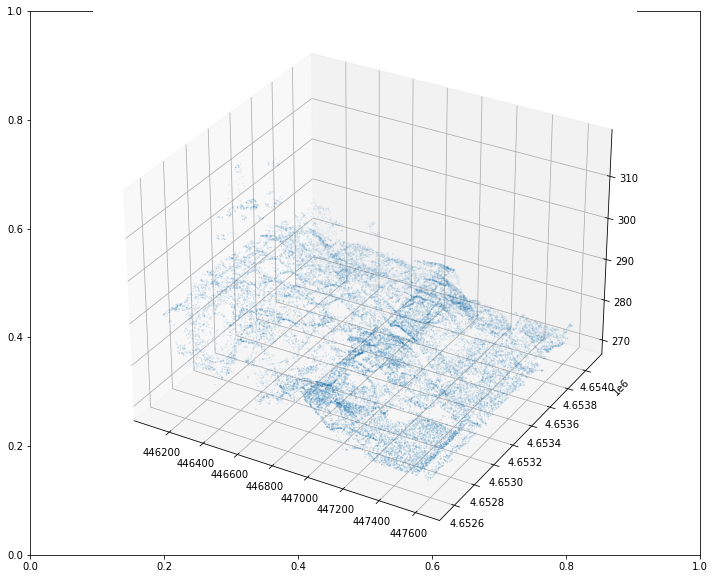

In [7]:
visulizer.plot_3d_terrain(decimate_df)